<a href="https://colab.research.google.com/github/Muhameddemadd/Histogram-Equalization/blob/master/DevisionX_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
## MORPHOLOGY TASK
img3 = cv2.imread("/content/image-3.jpeg")

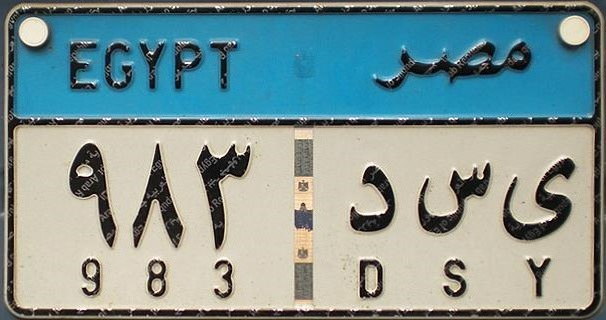

In [ ]:
cv2_imshow(img3)

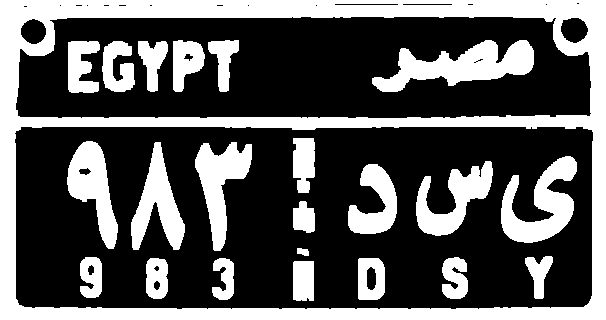

In [ ]:
# For the whole plate details
hsv = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)
lower = np.array([0, 0, 0], np.uint8)
upper = np.array([179, 255, 120], np.uint8)
kernel = np.ones((5, 5), np.uint8)
mask = cv2.inRange(hsv, lower, upper)
img_dilation = cv2.dilate(mask, kernel, iterations=1)
cv2_imshow(img_dilation)

In [ ]:
#For numbers and letters only

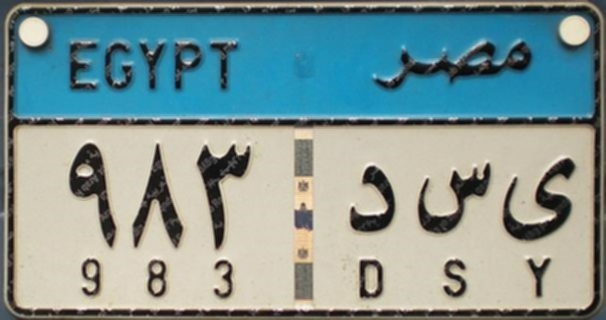

In [ ]:
blur = cv2.blur(img3, (3,3)) # to reduce the unwanted details
cv2_imshow(blur)

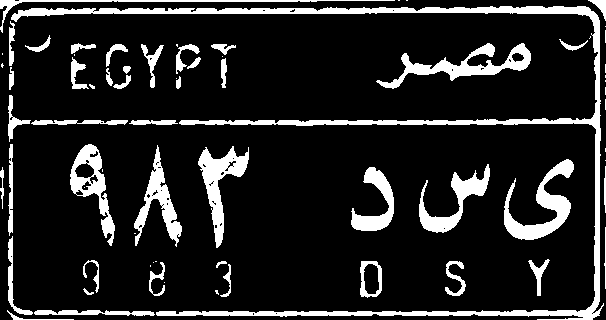

In [ ]:
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
lower = np.array([0, 0, 0], np.uint8)
upper = np.array([179, 255, 76], np.uint8)
kernel = np.ones((3, 3), np.uint8)
mask = cv2.inRange(hsv, lower, upper)
cv2_imshow(mask)

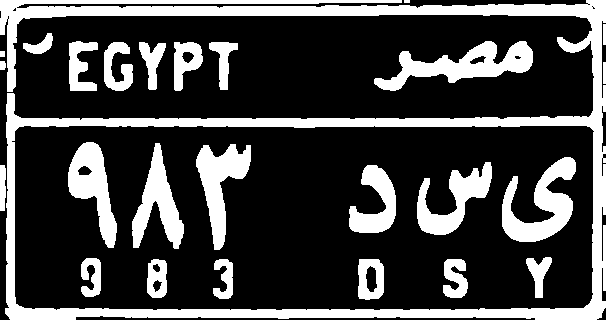

In [ ]:
img_dilation = cv2.dilate(mask, kernel, iterations=2)
cv2_imshow(img_dilation)

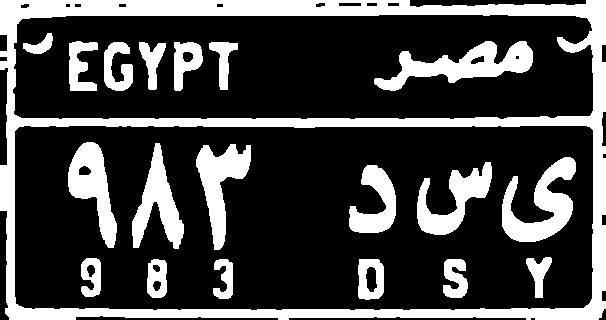

In [ ]:
#Closing the small gaps
closing = cv2.morphologyEx(img_dilation, cv2.MORPH_CLOSE, kernel, iterations=1)
cv2_imshow(closing)

In [ ]:
## HISTOGRAM EQUALIZATION

In [ ]:
img1 = cv2.imread("/content/image-1.png")
img2 = cv2.imread("/content/image-2.png")

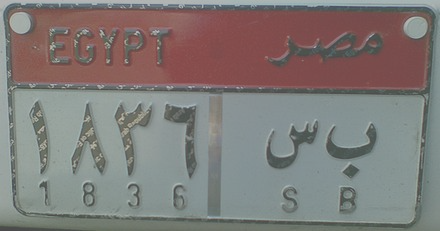

[[[181 181 177]
  [180 178 174]
  [181 181 179]
  ...
  [178 178 166]
  [178 178 166]
  [178 177 166]]

 [[181 181 178]
  [181 180 177]
  [178 178 177]
  ...
  [176 176 165]
  [177 177 166]
  [178 178 166]]

 [[180 180 177]
  [180 180 178]
  [181 181 180]
  ...
  [176 176 166]
  [176 177 167]
  [177 177 167]]

 ...

 [[ 76  78  78]
  [ 76  78  77]
  [ 75  77  77]
  ...
  [123 130 120]
  [123 130 120]
  [123 130 120]]

 [[ 76  75  76]
  [ 76  75  76]
  [ 76  75  76]
  ...
  [120 128 119]
  [121 129 119]
  [121 129 119]]

 [[ 76  75  76]
  [ 76  75  76]
  [ 77  75  76]
  ...
  [118 127 118]
  [119 128 118]
  [119 128 118]]]


In [ ]:
cv2_imshow(img1)
print(img1)

In [ ]:
img1 = np.asarray(img1)


In [ ]:
flat1 = img1.flatten()

In [ ]:
print(flat1)

[181 181 177 ... 119 128 118]


In [ ]:
histogram = np.zeros(256) # zeros array
# resize the img in 256 array
for pixel in img1:
    histogram[pixel] += 1

In [ ]:
print(len(histogram))

256


In [ ]:
#convert histogram array to list
np.array(histogram.tolist())

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 195., 172.,
       188., 185., 196., 201., 195., 213., 200., 212., 210., 215., 205.,
       205., 209., 211., 215., 214., 208., 218., 210., 220., 212., 206.,
       214., 213., 218., 203., 220., 211., 207., 218., 209., 213., 213.,
       205., 214., 214., 215., 208., 218., 212., 214., 225., 221., 225.,
       222., 221., 228., 224., 228., 226., 227., 227., 226., 224., 223.,
       224., 219., 220., 219., 220., 220., 218., 219., 219., 220., 220.,
       218., 219., 212., 210., 215., 201., 199., 18

In [ ]:
Csum=[]
j=0
for i in range(0,len(histogram)):
    j+=histogram[i]
    Csum.append(j)
     
print(Csum)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 195.0, 367.0, 555.0, 740.0, 936.0, 1137.0, 1332.0, 1545.0, 1745.0, 1957.0, 2167.0, 2382.0, 2587.0, 2792.0, 3001.0, 3212.0, 3427.0, 3641.0, 3849.0, 4067.0, 4277.0, 4497.0, 4709.0, 4915.0, 5129.0, 5342.0, 5560.0, 5763.0, 5983.0, 6194.0, 6401.0, 6619.0, 6828.0, 7041.0, 7254.0, 7459.0, 7673.0, 7887.0, 8102.0, 8310.0, 8528.0, 8740.0, 8954.0, 9179.0, 9400.0, 9625.0, 9847.0, 10068.0, 10296.0, 10520.0, 10748.0, 10974.0, 11201.0, 11428.0, 11654.0, 11878.0, 12101.0, 12325.0, 12544.0, 12764.0, 12983.0, 13203.0, 13423.0, 13641.0, 13860.0, 14079.0, 14299.0, 14519.0, 14737.0, 14956.0, 15168.0, 15378.0, 15593.0, 15794.0, 15993.0, 1

In [ ]:
minimum = min(Csum)
maximum = max(Csum)

In [ ]:
print(minimum,maximum)

0.0 20850.0


In [ ]:
nj = (Csum - minimum) * 255
N = maximum - minimum
Csum = nj / N

In [ ]:
print(Csum)

[  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   2.38489209   4.48848921   6.78776978   9.05035971  11.44748201
  13.9057554   16.29064748  18.89568345  21.34172662  23.9345323

In [ ]:
Csum = Csum.astype('uint8')

In [ ]:
print(Csum)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   2   4   6   9  11  13  16  18  21  23  26  29  31  34  36
  39  41  44  47  49  52  54  57  60  62  65  68  70  73  75  78  80  83
  86  88  91  93  96  99 101 104 106 109 112 114 117 120 123 125 128 131
 134 136 139 142 145 147 150 153 156 158 161 164 166 169 172 174 177 180
 182 185 188 190 193 195 197 199 202 204 206 209 211 213 215 218 220 223
 225 227 230 232 235 237 238 241 242 244 245 247 248 249 250 251 252 253
 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

In [ ]:
output = Csum[flat1]

In [ ]:
print(output)

[255 255 251 ... 114 139 112]


In [ ]:
img1_new = np.reshape(output, img1.shape)

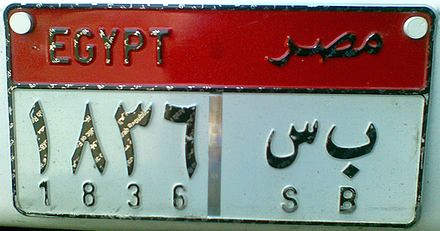

In [ ]:
cv2_imshow(img1_new)

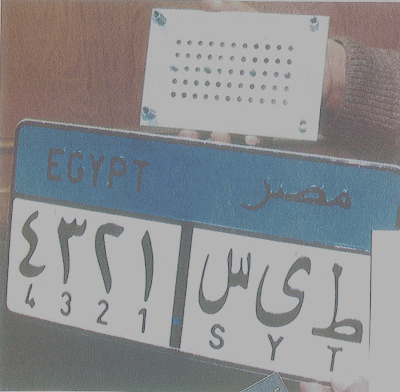

In [ ]:
## Repeat the whole process for img2
cv2_imshow(img2)

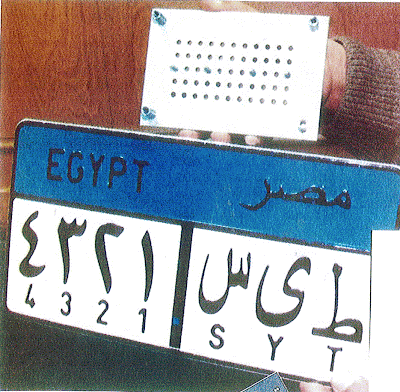

In [ ]:
img2 = np.asarray(img2)
flat2 = img2.flatten()

histogram2 = np.zeros(256)  
for pixel in img2:
    histogram2[pixel] += 1

Csum2=[]
x=0
for i in range(0,len(histogram2)):
    x+=histogram2[i]
    Csum2.append(x)

minimum2 = min(Csum2)
maximum2 = max(Csum2)

nj2 = (Csum2 - minimum2) * 255
N2 = maximum2 - minimum2
Csum2 = nj2 / N2
Csum2 = Csum2.astype('uint8')
output2 = Csum2[flat2]
img2_new = np.reshape(output2, img2.shape)
cv2_imshow(img2_new)


In [ ]:
# Try any img

def Histogram_equalization(img_path):
  img = cv2.imread(img_path)
  flat = img.flatten()
  histogram = np.zeros(256)
  Csum=[]
  x=0

  for pixel in img:
      histogram[pixel] += 1

  for i in range(0,len(histogram)):
      x+=histogram[i]
      Csum.append(x)

  minimum = min(Csum)
  maximum = max(Csum)

  nj = (Csum - minimum) * 255
  N = maximum - minimum
  Csum = nj / N
  Csum = Csum.astype('uint8')
  output = Csum[flat]
  img_new = np.reshape(output, img.shape)
  
  return cv2_imshow(img_new)



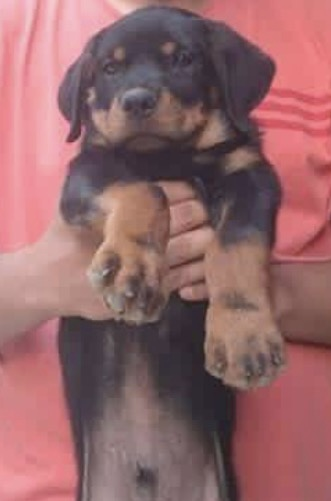

In [ ]:
# Trying to enhance my puppy's pic
jivara = cv2.imread("/content/IMG_1469_Original.PNG")
cv2_imshow(jivara)

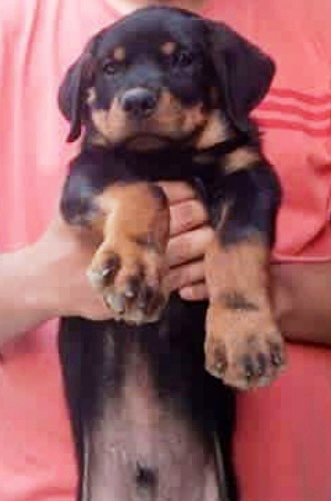

In [ ]:
Histogram_equalization("/content/IMG_1469_Original.PNG")